<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
#Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [2]:
# Import all necessary libraries.
import numpy as np
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import copy
import random

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
from NomeroffNet.tools.image_processing import generate_image_rotation_variants, rotate_im

2021-07-05 09:58:38,866 [46651] WARNING  py.warnings:109: [JupyterRequire] /usr/local/lib64/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0



In [4]:
from NomeroffNet.YoloV5Detector import Detector

detector = Detector()
detector.load()

In [5]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft, getCvZoneRGB, convertCvZonesRGBtoBGR, reshapePoints

npPointsCraft = NpPointsCraft()
npPointsCraft.load()

Loading weights from checkpoint (/mnt/data/var/www/nomeroff-net/NomeroffNet/Base/mcm/./data/./models/NpPointsCraft/craft_mlt/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/mnt/data/var/www/nomeroff-net/NomeroffNet/Base/mcm/./data/./models/NpPointsCraft/craft_refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [6]:
from NomeroffNet.OptionsDetector import OptionsDetector
from NomeroffNet.TextDetector import TextDetector

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    },
    "su": {
        "for_regions": ["su"],
        "model_path": "latest"
    }
})

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

images/example1.jpeg


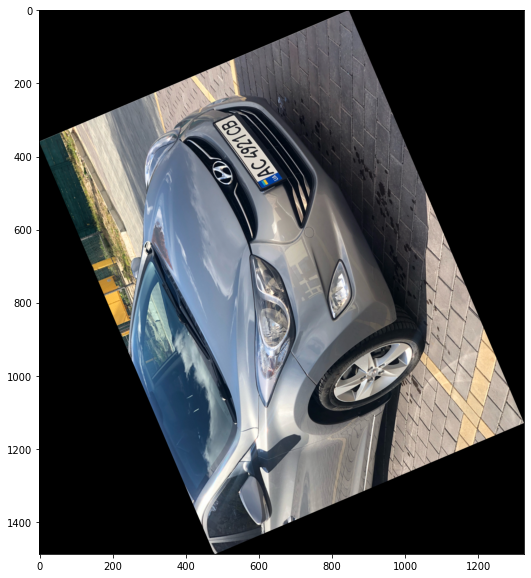

propably_points
[[480.57028218615176, 304.95084724091674], [524.3467309716872, 272.77779226409456], [669.0, 469.60107934711476], [625.2235490134353, 501.77412918253776]]
net_out_value (1, 32, 37)
propably_points
[[307.59950924487794, 848.6276567682969], [271.4559497090478, 800.0597565777875], [462.85643267582486, 657.6221779756718], [499.0, 706.1900896247829]]
net_out_value (1, 32, 37)
propably_points
[[657.0, 1022.4358755704698], [700.3441324780815, 989.7707375334165], [844.0, 1180.3910010737889], [800.6558523252135, 1213.0561629197332]]
net_out_value (1, 32, 24)
propably_points
[[1025.1373184798967, 669.4084486076322], [989.0, 621.5054883236998], [1169.8626879329295, 485.06521447612437], [1206.0, 532.9681790270369]]
net_out_value (1, 32, 24)
[[657.0, 1022.4358755704698], [700.3441324780815, 989.7707375334165], [844.0, 1180.3910010737889], [800.6558523252135, 1213.0561629197332]] eu_ua_2015 1 1 AC4921CB


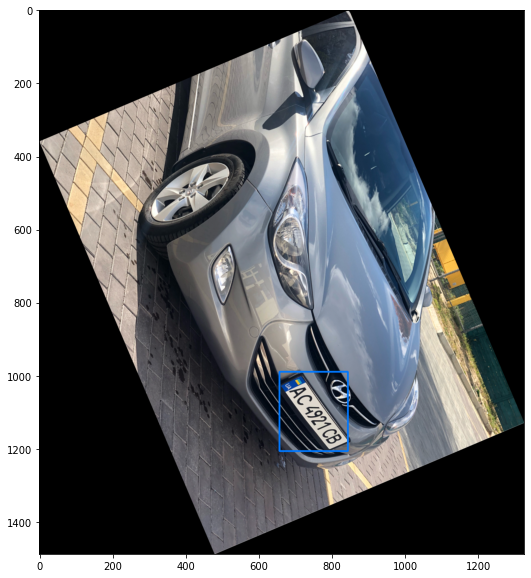

images/250030939.jpeg


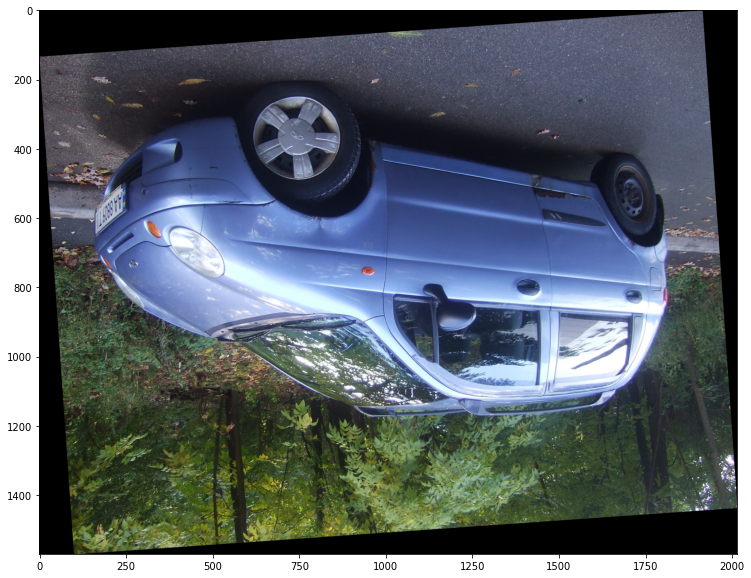

propably_points
[[182.18065654433934, 625.3836017898965], [153.7676728645966, 592.9116168099932], [234.46902465820312, 522.2979373931885], [262.8820114135742, 554.7699165344238]]
net_out_value (1, 32, 37)
propably_points
[[497.0, 1753.1652075217432], [531.7752007456054, 1723.541895816453], [647.0, 1858.8058341271135], [612.2248193528376, 1888.4291450212813]]
propably_points
[[1777.572463607788, 1053.737110671997], [1748.8046580120244, 1023.2770657905747], [1827.604133605957, 948.8553562164307], [1856.371940612793, 979.3153991699219]]
net_out_value (1, 32, 24)
propably_points
[[923.0, 165.56000490831397], [957.4779077120002, 133.38062352262168], [1073.0, 257.15430829178973], [1038.5220949731156, 289.3336891651892]]
[[1763.1885608099062, 1067.3219046958204], [1763.1885608099062, 1009.6922717667513], [1841.9880364038388, 935.2705621926073], [1841.9880378149112, 992.9001931937453]] eu_ua_2015 1 1 AA8809T


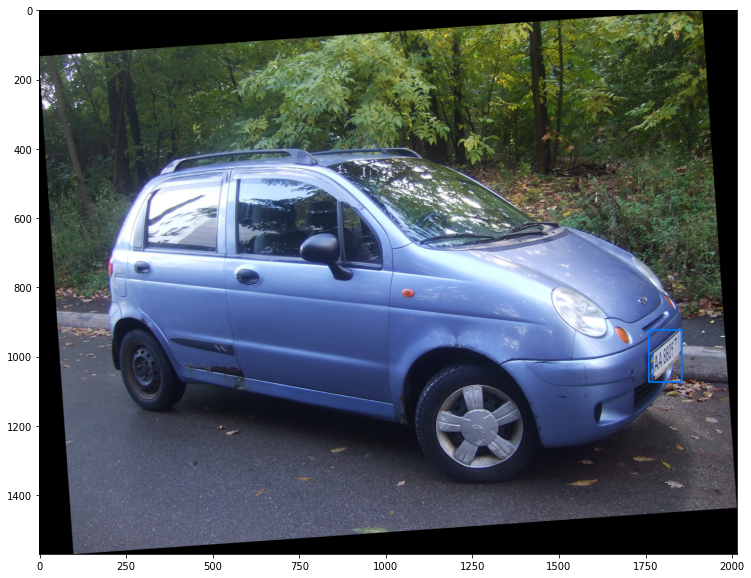

images/example2.jpeg


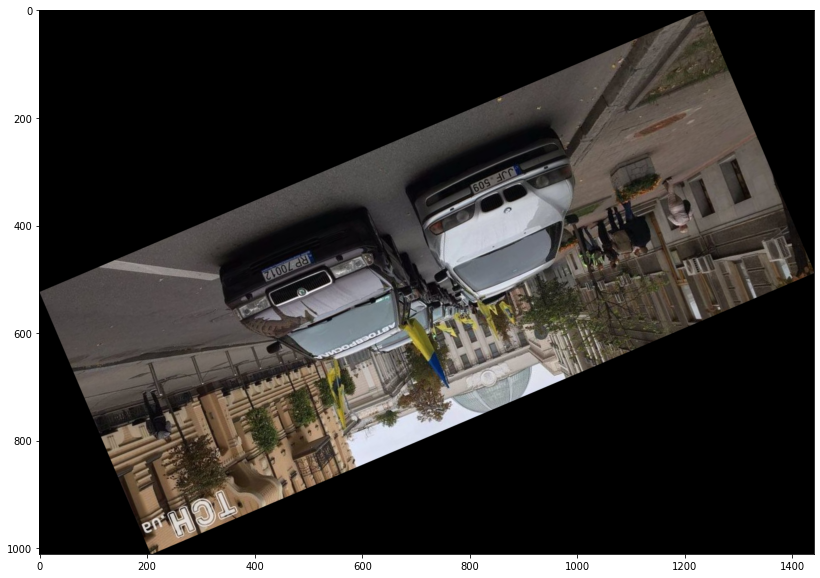

propably_points
[[415.128122439839, 512.95285205984], [405.0362613502772, 489.58221293595705], [502.90813962412415, 447.319366616148], [513.0, 470.6899987677896]]
propably_points
[[444.0, 921.2856906815107], [463.71597384793466, 913.1673535296464], [507.64496994018555, 1019.8520584106445], [487.9289970397949, 1027.9703979492188]]
net_out_value (1, 32, 37)
propably_points
[[935.4297432465764, 566.8950549198296], [925.103432685365, 543.5486151370771], [1020.8829388560033, 501.184600113739], [1031.2092547430345, 524.5310383944706]]
net_out_value (1, 32, 37)
propably_points
[[499.9609667580521, 416.24549281892087], [521.7341605834002, 406.5685192060102], [566.0, 506.16666904073685], [544.2268026077, 515.8436405732738]]
net_out_value (1, 32, 37)
[[444.0, 921.2856906815107], [463.71597384793466, 913.1673535296464], [507.64496994018555, 1019.8520584106445], [487.9289970397949, 1027.9703979492188]] eu 4 1 RP70012


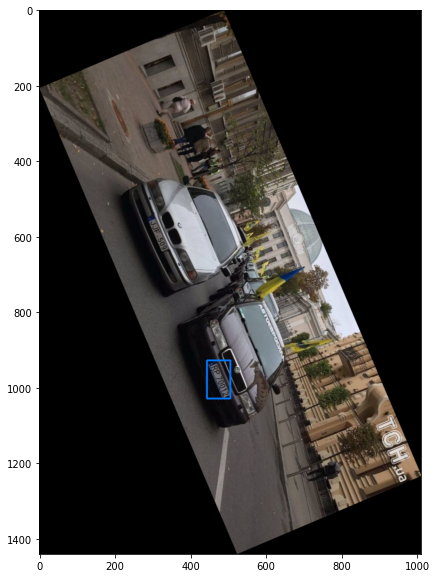

images/296023036.jpeg


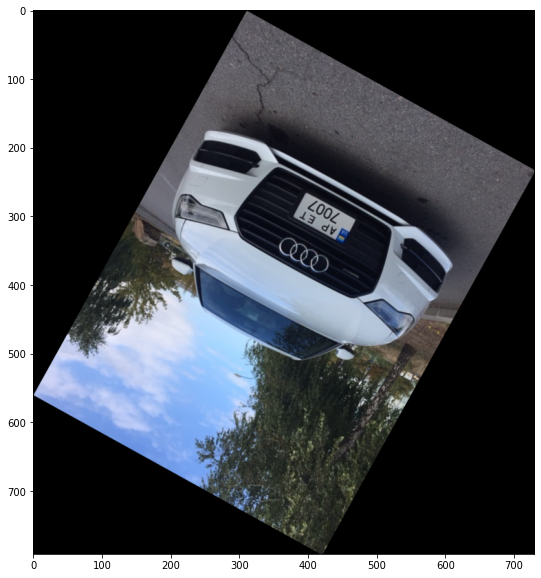

propably_points
[[374.6246049366512, 308.04832178084916], [397.87218008087774, 264.1362437048731], [470.0, 302.3215575723216], [446.75242520542184, 346.2336285791595]]
net_out_value (1, 32, 37)
propably_points
[[284.49056835178595, 349.2503172153422], [264.0, 337.8666651110479], [320.50943610085244, 236.14968557319955], [341.0, 247.53333218383708]]
propably_points
[[260.0, 490.1888891941965], [284.494689237951, 444.96794087975206], [353.1296743774414, 482.14522468566895], [328.6349893627807, 527.366177363351]]
net_out_value (1, 32, 24)
propably_points
[[451.0, 428.6666487859934], [477.52551033569034, 375.6156777056763], [528.0, 400.85293257440856], [501.47448715516487, 453.9039086730141]]
[[284.49056835178595, 349.2503172153422], [264.0, 337.8666651110479], [320.50943610085244, 236.14968557319955], [341.0, 247.53333218383708]] kg 13 1 


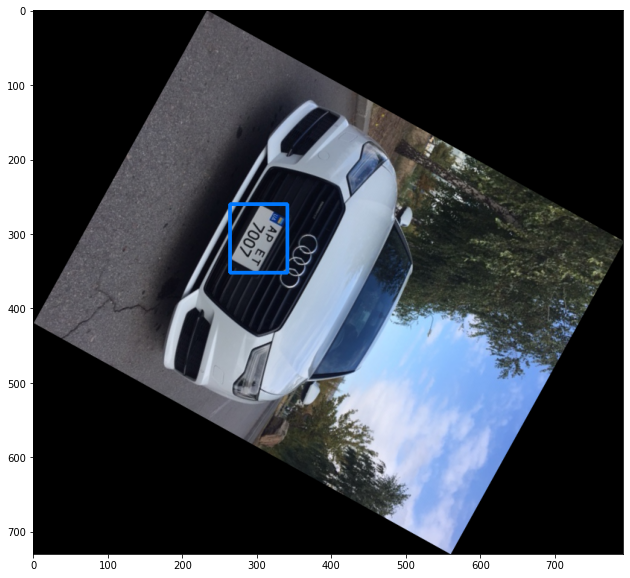

images/10002_B8233XA.jpg


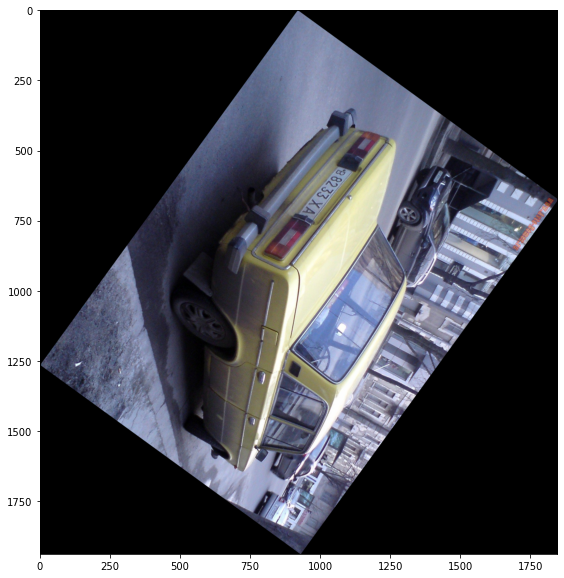

propably_points
[[958.0758023940094, 759.8354431283726], [919.0, 726.823144889948], [1086.9241937504344, 528.0557261224618], [1126.0, 561.0680328304898]]
net_out_value (1, 32, 37)
propably_points
[[533.6025921693839, 769.4705503189242], [569.0852106299828, 726.5179176425665], [761.0, 885.0562386417408], [725.5173828860466, 928.008877712867]]
net_out_value (1, 32, 40)
propably_points
[[762.3137592027707, 1421.1650729189455], [720.0, 1387.6666915813705], [884.9776000976562, 1179.2739231586456], [927.2913665771484, 1212.7723197937012]]
net_out_value (1, 32, 40)
propably_points
[[1177.0, 958.5512346930967], [1214.112304575194, 915.3263106600817], [1393.0, 1068.91674733981], [1355.887695466026, 1112.1416788016227]]
net_out_value (1, 32, 37)
[[533.6025921693839, 769.4705503189242], [569.0852106299828, 726.5179176425665], [761.0, 885.0562386417408], [725.5173828860466, 928.008877712867]] su 12 1 В8233ХА


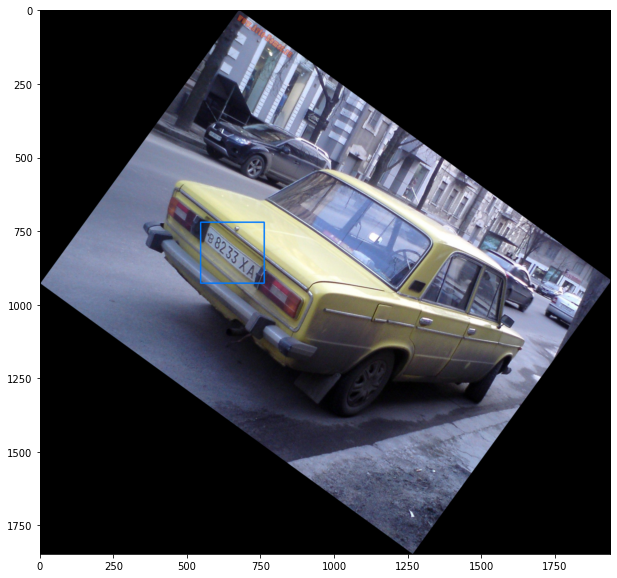

images/inx960x640.jpg


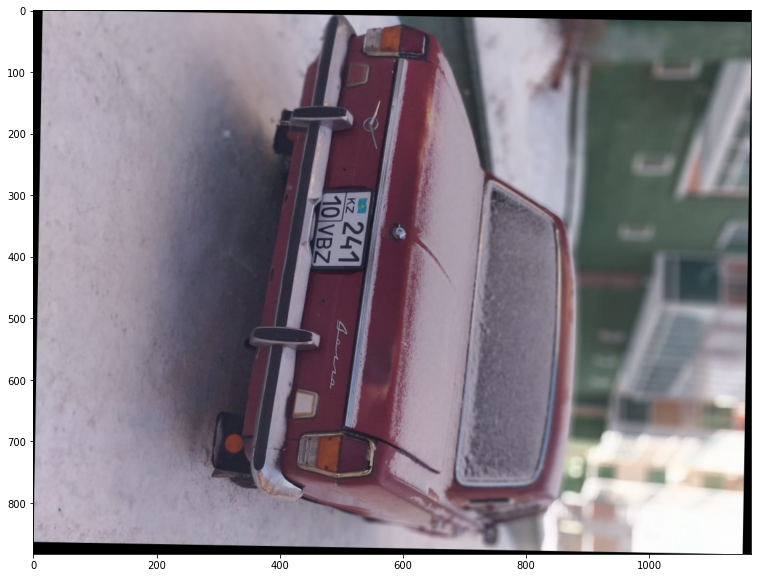

propably_points
[[443.73373287698575, 411.1447448523932], [466.19736557769875, 292.0875492835946], [552.1588821411133, 308.3067054748535], [529.6952514648438, 427.3638916015625]]
propably_points
[[285.64166403903954, 703.2715807058335], [298.12916481122966, 615.8591174910546], [424.18247709579464, 633.8667331672668], [411.6949795017242, 721.2791928272247]]
net_out_value (1, 32, 37)
propably_points
[[693.7142758195744, 609.7065419238368], [615.0, 596.9420917760865], [637.6940307617188, 456.99543380737305], [716.4083023071289, 469.75989055633545]]
net_out_value (1, 32, 37)
propably_points
[[450.3540150064112, 535.1367355869231], [466.01956659588734, 444.62466139812915], [590.0, 466.0828060539161], [574.3344494626956, 556.5948781985974]]
net_out_value (1, 32, 37)
[[458.1867908011493, 536.4924077200774], [458.18679080114924, 443.2689892649749], [582.1672242052618, 464.72713392076184], [582.1672252574338, 557.9505503317516]] kz 7 2 ZS


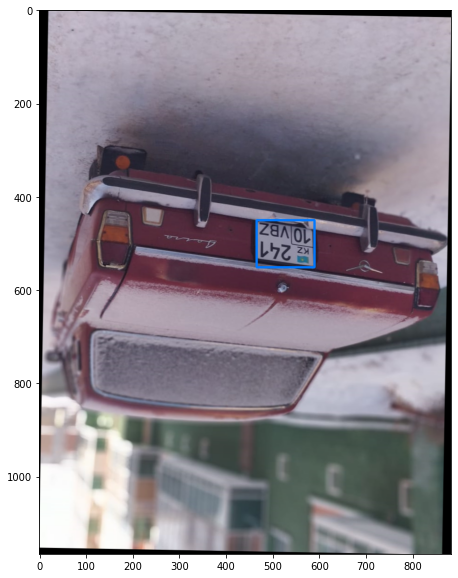

images/20190525.jpg


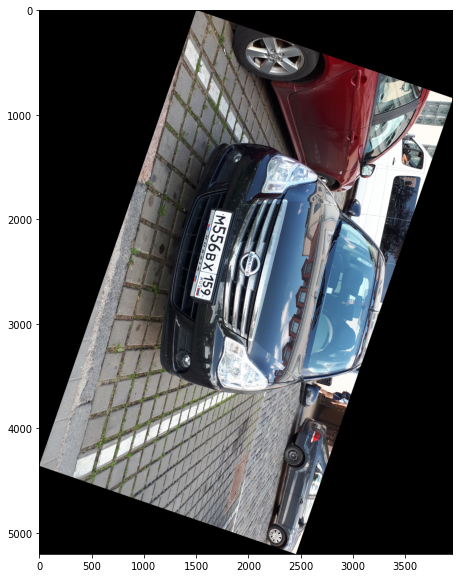

propably_points
[[1587.0737639899319, 2928.8479789063153], [1453.0, 2898.0047792868686], [1708.9262044858938, 1785.5091165926224], [1843.0, 1816.3523181987484]]
propably_points
[[1885.9898961651093, 2266.308153844193], [1926.3544261009417, 2099.6078903660923], [2797.0, 2310.4245360789064], [2756.6354419314475, 2477.1248032604294]]
net_out_value (1, 32, 23)
propably_points
[[2233.011613900167, 3402.1845476929566], [2107.0, 3372.7621238092083], [2370.9883851117643, 2242.145023223714], [2497.0, 2271.567513078714]]
propably_points
[[2386.3574962770494, 1629.1917589761529], [2426.9944110233773, 1463.4639416227437], [3292.0, 1675.5656120621104], [3251.363132501817, 1841.2934390966075]]
net_out_value (1, 32, 37)
[[1885.9898961651093, 2266.308153844193], [1926.3544261009417, 2099.6078903660923], [2797.0, 2310.4245360789064], [2756.6354419314475, 2477.1248032604294]] ru 6 1 M556BX159


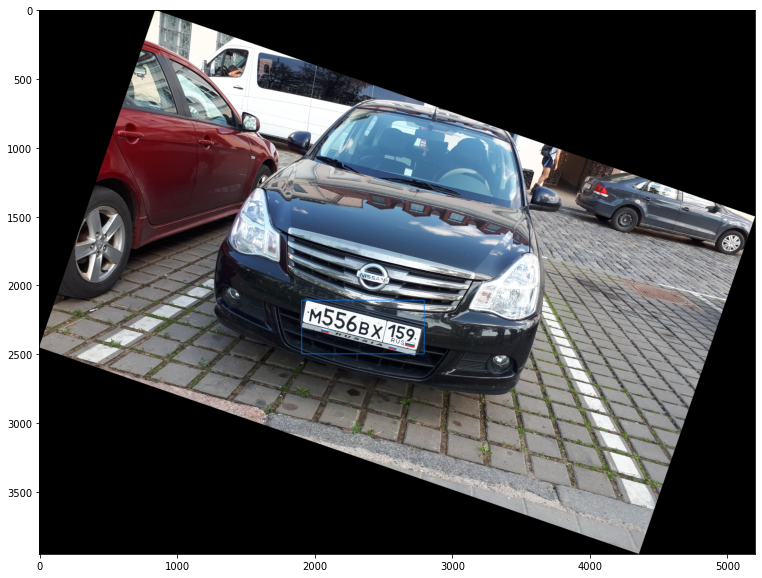

images/20717578-39-full.jpg


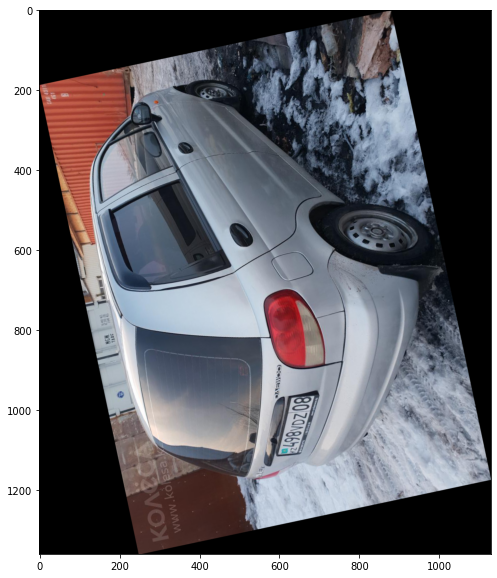

propably_points
[[635.2870982021107, 1168.8228591692864], [589.0, 1157.5333235806786], [652.7129023187094, 896.3104339327799], [699.0, 907.5999667717541]]
propably_points
[[945.5137653827195, 492.2901022200359], [957.7961901530276, 439.2817189054037], [1119.0, 476.633822975253], [1106.7175805109423, 529.6422161589603]]
net_out_value (1, 32, 37)
propably_points
[[477.52390111708064, 457.21393078684923], [429.0, 444.5555295121073], [490.4760966375874, 208.89717759832342], [539.0, 221.555585647321]]
propably_points
[[241.0, 649.9621933940525], [254.60324326405578, 597.6971028770039], [406.6979376220703, 637.2833973693847], [393.09469543093996, 689.5484889360673]]
net_out_value (1, 32, 37)
[[951.6549777678736, 493.7130664628543], [951.6549777678736, 437.85875466258534], [1112.8587876148458, 475.21085873243464], [1112.8587928960965, 531.0651804017787]] eu 4 1 B0Z0867


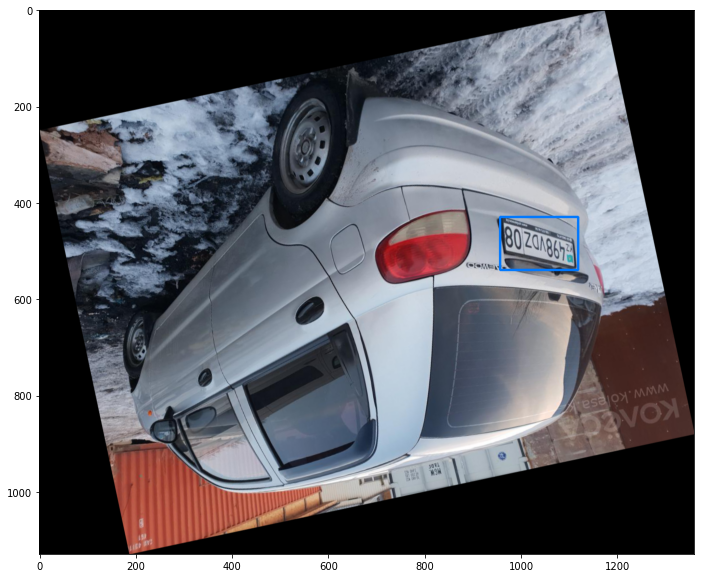

images/241458051.jpg


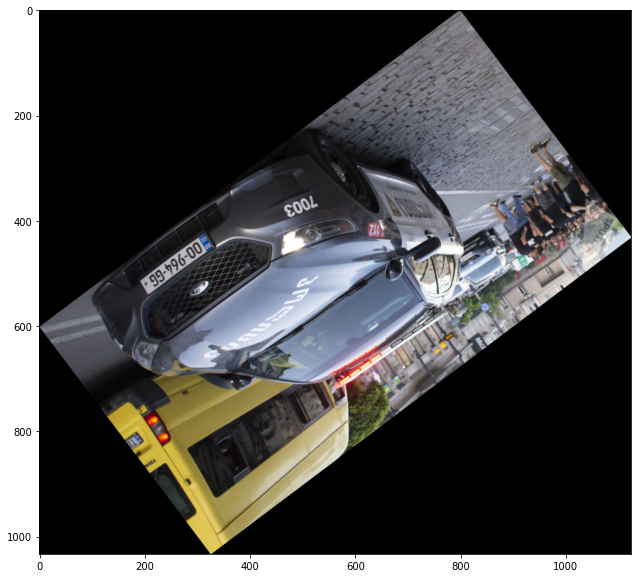

propably_points
[[209.0708177605011, 540.5975624191384], [189.0, 513.2670826256253], [312.9291833938282, 422.2565886623694], [333.0, 449.58706727036935]]
net_out_value (1, 32, 36)
propably_points
[[419.0, 806.6078550234105], [444.3056221659877, 787.90369212881], [544.0, 922.7843195364305], [518.694373266726, 941.4884903679032]]
net_out_value (1, 32, 36)
propably_points
[[811.0582118869045, 611.7050837385909], [791.0, 584.7302521090223], [914.9417956503025, 492.5684163004317], [935.0, 519.5432521212331]]
net_out_value (1, 32, 36)
propably_points
[[486.91322752791604, 201.0424514539418], [512.5454393672732, 182.025005831042], [613.0, 317.42028576526627], [587.3677818550982, 336.43773473786655]]
net_out_value (1, 32, 37)
[[811.0582118869045, 611.7050837385909], [791.0, 584.7302521090223], [914.9417956503025, 492.5684163004317], [935.0, 519.5432521212331]] ge 10 1 00964GG


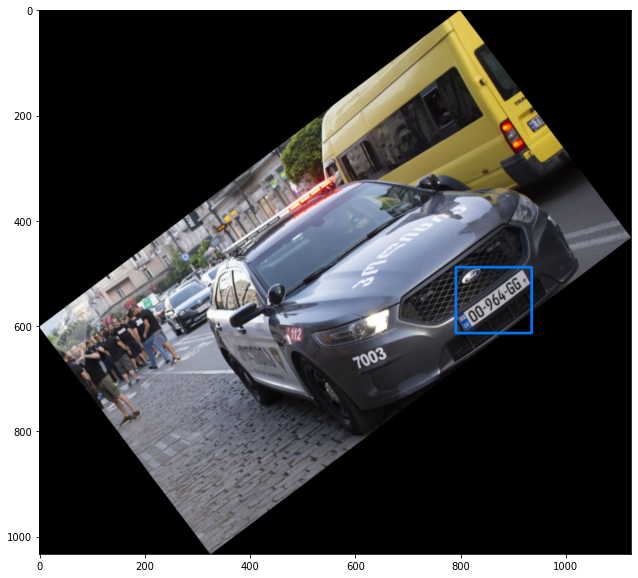

In [10]:
rootDir = 'images/*'


for img_path in glob.glob(rootDir):
    print(img_path)
    img = mpimg.imread(img_path)
    angle = int(random.uniform(90, 270))
    img = rotate_im(img, angle)
    plt.imshow(img)
    plt.show()
    
    target_boxes = detector.detect_bbox(copy.deepcopy(img))
    if not len(target_boxes):
        break
    
    variant_images, variants_bboxes = generate_image_rotation_variants(img, target_boxes)
    res_variants = [[] for _ in target_boxes]
    for i, (variant_image, variant_bboxes) in enumerate(zip(variant_images, variants_bboxes)):
        all_points = npPointsCraft.detect(variant_image, variant_bboxes)

         # cut zones
        toShowZones = [getCvZoneRGB(variant_image, reshapePoints(rect, 1)) for rect in all_points]
        zones = convertCvZonesRGBtoBGR(toShowZones)

        # find standart
        region_ids, count_lines, confidences, predicted = optionsDetector.predict_with_confidence(zones)

        region_names = optionsDetector.getRegionLabels(region_ids)

        # find text with postprocessing by standart  
        text_arr, text_predicted = textDetector.predict(zones, region_names, count_lines, return_acc=True)
        text_accs = textDetector.get_acc(text_predicted, text_arr, region_names)
        
        for j, (bbox, points, region_name, 
            region_id, count_line, confidence, 
            text, text_acc) in enumerate(zip(variant_bboxes, all_points, 
                                   region_names, region_ids, count_lines, confidences, 
                                   text_arr, text_accs)):
                all_confidence = confidence[0]*confidence[1]*text_acc[0]
                if not len(res_variants[j]) or res_variants[j][0] < all_confidence:
                    res_variants[j] = [
                        all_confidence,
                        bbox, 
                        points, 
                        region_name, 
                        region_id, 
                        count_line, 
                        text,
                        variant_image,
                    ]
                    
    # draw rect and 4 points
    for all_confidence, bbox, points, region_name, region_id, count_line, text, variant_image in res_variants:
        print(points, region_name, region_id, count_line, text)
        cv2.rectangle(variant_image, 
                      (int(bbox[0]), int(bbox[1])), 
                      (int(bbox[2]), int(bbox[3])), 
                      (0,120,255), 
                      3)
    plt.imshow(variant_image)
    plt.show()
    #break